# Introdução


Esse é um projeto pessoal de Análise de Dados de vendas de carros com um dataset disponiblizado no [Kaggle](https://github.com/loggi/loggibud/blob/master/docs/quickstart.md). O dataset compõe dados das vendas de carros nos anos de 2022 e 2023 com as seguintes informações.

- **Car_id:** identificador único para cada carro no dataset
- **Date:** data da compra
- **Customer Name:** nome do comprador
- **Gender:** gênero do comprador
- **Annual Income:** renda anual do comprado
- **Dealer_Name:** nome da loja revendedora associada à compra
- **Company:** marca do carro
- **Model:** modelo do carro
- **Engine:** especificação do motor do carro
- **Transmission:** tipo de transmissão
- **Color:** cor do carro
- **Price** valor da venda
- **Dealer_No:** número associado a loja - não especificado
- **Body Style:** estilo de corpo do carro
- **Phone:** número de telefone do comprador
- **Region:** região da venda

Objetivos do projeto:
- Avaliar tendência e sazonalidade das vendas ao longo desses anos
- Analisar desempenho de desempenho de vendas por revendedora e região
- Entender as preferências dos consumidores nas compras
- Obter uma previsão para as vendas de 2024


#  Importação de bibliotecas

In [ ]:
import datetime as dt
import warnings

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.simplefilter('ignore')

# Coleta e processamento dos dados

In [ ]:
#leitura dos dados
car_sales_data = pd.read_csv('/Users/davicarvalho/Downloads/Projeto Car Sales /Car Sales.xlsx - car_data.csv')

# Primeiras linhas do DataFrame:
print ('Primeiras linhas do DataFrame:')
car_sales_data.head()

Primeiras linhas do DataFrame:


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
#Rnomeando as colunas
new_columns = {'Car_id' : 'CAR_ID',
                'Date' : 'DATE',
                'Customer Name': 'CUSTOMER_NAME',
                'Gender' : 'GENDER',
                'Annual Income': 'ANNUAL_INCOME',
                'Dealer_Name' : 'DEALER_NAME',
                'Company' : 'COMPANY',
                'Model': 'MODEL',
                'Engine': 'ENGINE',
                'Transmission': 'TRANSMISSION',
                'Color': 'COLOR',
                'Price ($)': 'PRICE',
                'Dealer_No ': 'DEALER_NO',
                'Body Style': 'BODY_STYLE',
                'Phone': 'PHONE',
                'Dealer_Region' : 'DEALER_REGION'}
car_sales_data = car_sales_data.rename(columns=new_columns)

In [ ]:
# Informações sobre o DataFrame:
print(" Informações sobre o DataFrame: \n")
car_sales_data.info()

 Informações sobre o DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CAR_ID         23906 non-null  object
 1   DATE           23906 non-null  object
 2   CUSTOMER_NAME  23905 non-null  object
 3   GENDER         23906 non-null  object
 4   ANNUAL_INCOME  23906 non-null  int64 
 5   DEALER_NAME    23906 non-null  object
 6   COMPANY        23906 non-null  object
 7   MODEL          23906 non-null  object
 8   ENGINE         23906 non-null  object
 9   TRANSMISSION   23906 non-null  object
 10  COLOR          23906 non-null  object
 11  PRICE          23906 non-null  int64 
 12  DEALER_NO      23906 non-null  object
 13  BODY_STYLE     23906 non-null  object
 14  PHONE          23906 non-null  int64 
 15  DEALER_REGION  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Assim, podemos ver que não há dados nulos ou faltantes no DataFrame. A existência de dados nulos pode afetar diretamente as análises e modelagem de dados, pois algumas operações podem não ser realizadas adequadamente com valores ausentes.

In [ ]:
# Transformando o tipo dos dados
car_sales_data['DATE'] = pd.to_datetime(car_sales_data['DATE'])
car_sales_data['PHONE'] = car_sales_data['PHONE'].astype(str)


In [ ]:
# Estatísticas descritivas para colunas numéricas
print('Estatísticas descritivas para colunas numéricas : ')
car_sales_data.describe().round(2)

Estatísticas descritivas para colunas numéricas : 


,DATE,ANNUAL_INCOME,PRICE
count,23906,23906.00,23906.00
mean,2023-03-01 14:28:10.822387456,830840.29,28090.25
min,2022-01-02 00:00:00,10080.00,1200.00
25%,2022-09-20 00:00:00,386000.00,18001.00
50%,2023-03-13 00:00:00,735000.00,23000.00
75%,2023-09-08 00:00:00,1175750.00,34000.00
max,2023-12-31 00:00:00,11200000.00,85800.00
std,NaN,720006.40,14788.69


**Insights:**
* A maioria dos carros possui valor menor que 34k e o maior valor é  85,8k. O que mostra que, apesar de haver carros com preços maiores, as vendas se concentram em carros mais baratos, além de também apontar para a possibilidade de outliers no DataFrame.

* A diferença entre o terceiro quartil e o máximo em 'ANNUAL_INCOME' e o alto desvio padrão aponta para a presença de outliers, ou seja, uma pequena quantidade de clientes que ganham muito mais.


In [ ]:
# Estatísticas descritivas para colunas categóricas
print('Estatísticas descritivas para colunas categóricas : ')
car_sales_data.drop(['DATE', 'ANNUAL_INCOME', 'PRICE'], axis = 1).describe().round(2)

Estatísticas descritivas para colunas categóricas : 


,CAR_ID,CUSTOMER_NAME,GENDER,DEALER_NAME,COMPANY,MODEL,ENGINE,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,PHONE,DEALER_REGION
count,23906,23905,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906
unique,23906,3021,2,28,30,154,2,2,3,7,5,23804,7
top,C_CND_000001,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,6005535,Austin
freq,1,92,18798,1318,1819,418,12571,12571,11256,3814,6374,2,4135


In [ ]:
#Analisando relação das colunas 'ENGINE' e'TRANSMISSION'
print("Todos os carros com transmissão MANUAL possuem o motor : " , car_sales_data.query("TRANSMISSION == 'Manual'")['ENGINE'].unique())
print("Todos os carros com transmissão AUTO possuem o motor : " , car_sales_data.query("TRANSMISSION == 'Auto'")['ENGINE'].unique())

Todos os carros com transmissão MANUAL possuem o motor :  ['Overhead Camshaft']
Todos os carros com transmissão AUTO possuem o motor :  ['DoubleÂ\xa0Overhead Camshaft']


**Insights:**
* As variáveis 'CAR_ID', 'CUSTOMER_NAME', 'PHONE', 'ENGINE' não são relevantes para análise visto que:
    - 'CAR_ID' é um código único de identificação para cada carro e não apresenta atributos que se repetem e podem se correlacionar com as vendas
    - 'CUSTOMER_NAME' mostra apenas o primeiro nome, o que pode identificar clientes diferentes
    - 'PHONE' é uma característica única de cada cliente. Como temos 23906 valores totais, 23804 valores distintos e o mesmo dado aparece no máximo 2 vezes, concluimos que possivelmente, apenas 51 cliente compraram 2 carros, uma amostra muito pequena para podermos tirar conclusões sobre a recorrência de clientes.
    - 'ENGINE' pode ser descartada por ser correspondente a coluna 'TRANSMISSION'

**Investigar:**
* Como é o desempenho de vendas por :
    * revendedora ?
    * marca e modelo de carro ?
    * vendas por região ?
* Qual é a relação entre as características do carro e os dados de venda ?

In [ ]:
# descarte das colunas 'CAR_ID' , 'CUSTOMER_NAME', 'PHONE' e 'ENGINE'
car_sales_data = car_sales_data.drop(['CAR_ID' , 'CUSTOMER_NAME', 'PHONE','ENGINE'], axis =1)

# Análise Exploratória de Dados

## Análise de desempenho de vendas

In [ ]:
palette = sns.color_palette('colorblind' , 8)

### Desempenho das vendas ao longo do tempo

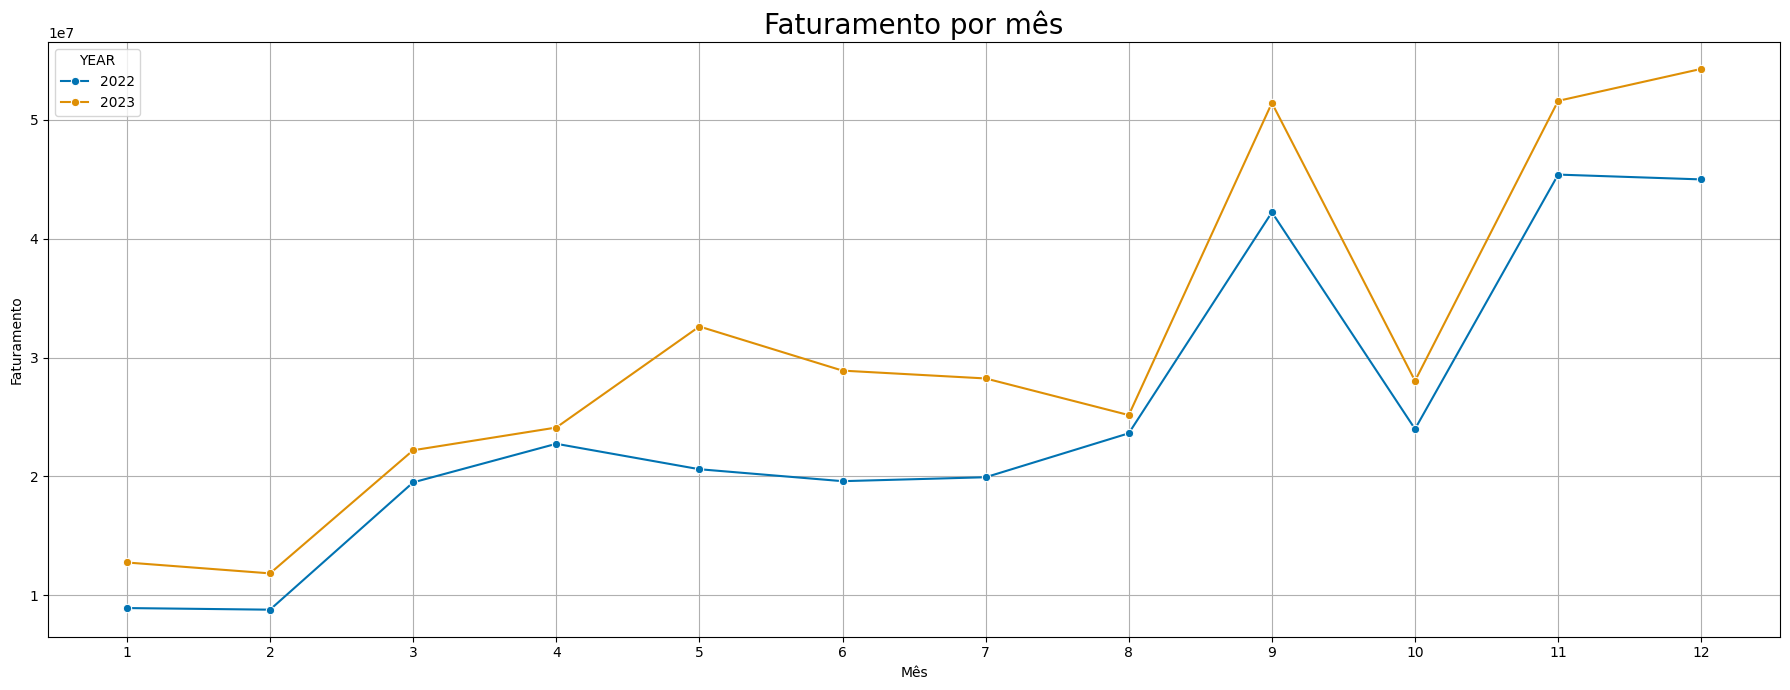

In [ ]:
car_sales_data['MONTH'] = car_sales_data['DATE'].dt.month
car_sales_data['YEAR'] = car_sales_data['DATE'].dt.year
monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR'])['PRICE'].sum().to_frame()

fig , ax = plt.subplots(figsize = (18,7))

sns.lineplot( data = monthly_sales , x= 'MONTH', y = 'PRICE', marker='o', hue='YEAR', errorbar=None ,palette = palette)
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.title('Faturamento por mês', fontsize = 20)
plt.xticks(range(1, 13))
plt.grid(True)

plt.tight_layout()
plt.show()

**Insight:** Pelo gráfico, podemos concluir:
* O ano de 2023 obteve uma performance melhor de vendas em todos os meses em comparação com o ano anterior
* Existe um padrão bem definido para as vendas ao longo do ano, com picos nos meses de setembro, novembro e dezembro, e uma queda em janeiro e fevereiro. Já os demais meses , o total de vendas permanece estável em torno de 2 e 3 milhões de dólares. É importante resaltar que de Maio a Julho de 2023 houve um compportamento diferente do padrao visto no ano passado.

**Investigar:**
* Quais fatores influenciam a queda de vendas em outubro?
* Quais fatores influenciaram o aumento de vendas de Maio a Julho em 2023 ?
    - Houve alguma ação de marketing ou campanha promocional durante o período?
    - Esse crescimento pode ser observado em todas as lojas revendedoras?

### Distribuição das vendas ( preço )

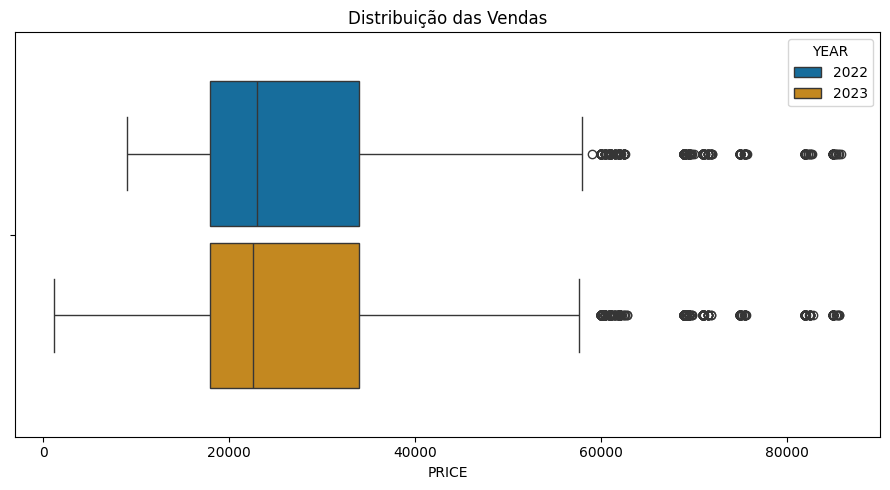

In [ ]:
fig, ax  = plt.subplots(figsize= (9,5))


sns.boxplot(data = car_sales_data[['PRICE', 'YEAR']],x = 'PRICE',  hue = 'YEAR',gap=.1 , palette = palette )
plt.title('Distribuição das Vendas')

plt.tight_layout()
plt.show()

**Insights:**
* Pelo gráfico é possível observar que a distribuição das vendas são semelhantes, com exceção das vendas de carros com valores menores em 2023.

**Investigar:**
* A vendas de carros com preços menores pode explicar o aumento de vendas de totais em 2023?



In [ ]:

soma_low_2023 = car_sales_data.query('YEAR == 2023 & PRICE <= 9000')['PRICE'].sum()
diferenca_22_23 = car_sales_data.query('YEAR == 2023')['PRICE'].sum() - car_sales_data.query('YEAR == 2022')['PRICE'].sum()

print (f"A diferença de faturamento entre os dois anos foi de ${diferenca_22_23}")
print (f"A soma das vendas de carros em 2023 com preços abaixo do preço mínimo de 2022 é ${soma_low_2023}, o que representa {((soma_low_2023/diferenca_22_23)*100).round(1)}% da diferença total")

A diferença de faturamento entre os dois anos foi de $70844775
A soma das vendas de carros em 2023 com preços abaixo do preço mínimo de 2022 é $807050, o que representa 1.1% da diferença total


**Conclusão:** Como a vendas de carros com preços menores representa um percetual muito pequeno da diferença entre o faturamento dos dois anos, isso não não é suficiente para  explicar o aumento de vendas de totais em 2023

## Análise de desempenho das revendedoras

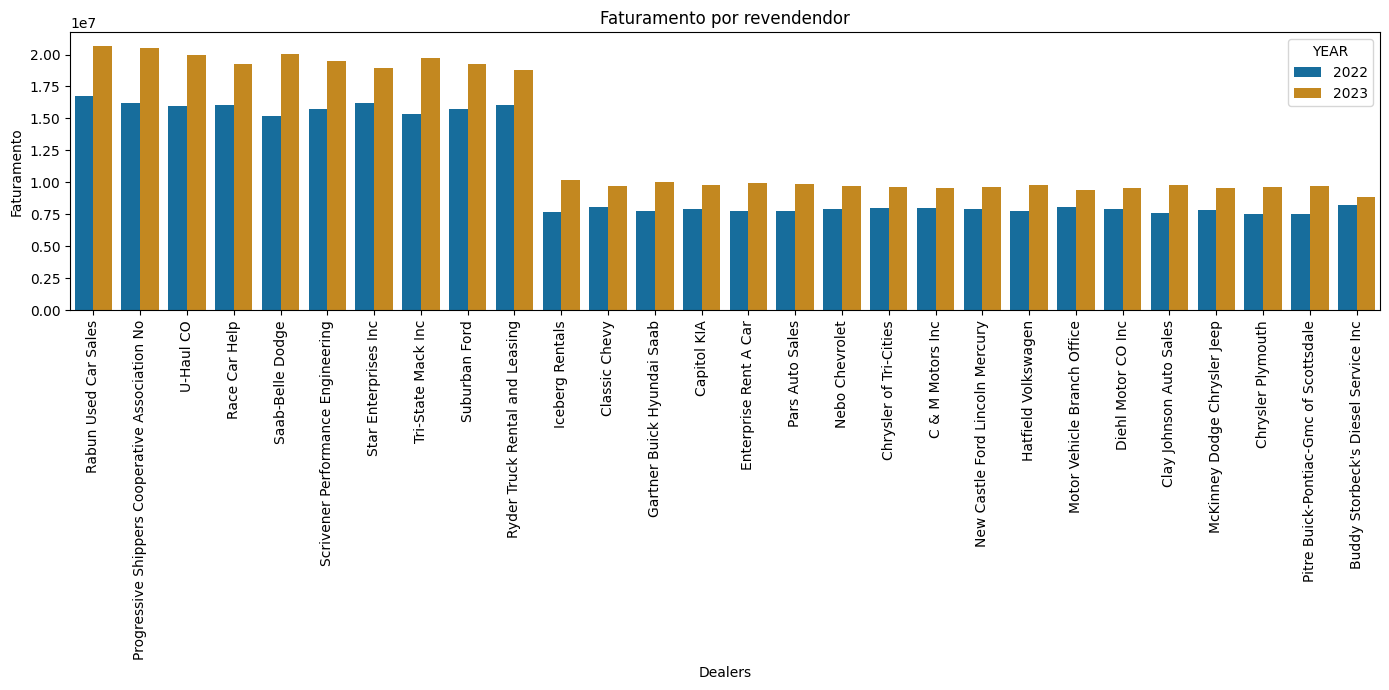

In [ ]:
dealers_sales = car_sales_data.groupby(['DEALER_NAME'])['PRICE'].sum().to_frame()
sales_order = list(dealers_sales.sort_values(by=['PRICE'], ascending=False).index)
dealers_sales_by_year = car_sales_data.groupby(['DEALER_NAME', 'YEAR'])['PRICE'].sum().to_frame()

fig , ax = plt.subplots(figsize = (14,7))
sns.set_palette('colorblind')

sns.barplot( data = dealers_sales_by_year , x= 'DEALER_NAME', y = 'PRICE',hue = 'YEAR', order=sales_order, palette = palette )
plt.xlabel('Dealers')
plt.ylabel('Faturamento')
plt.title('Faturamento por revendendor')
plt.xticks(rotation=90)
plt.tight_layout()


**Insights:**
 * As lojas podem ser divididas em dois grupos bem demarcados e com padrões visíves de acordo o faturamento total. Um grupo formado pelos 10 maiores faturamentos e outro pelos 18 com menor faturamento.

**Investigar**
 * A divisão desse grupo pode ter como influência :
   - a região em que a loja se encontra ?
   - as características de carro que é vendida pela revendedora ?

### Análise das lojas por grupo

Definimos como grupo A as 10 lojas com mais vendas, enquanto as demais compõem o grupo B.

In [ ]:
groupA = car_sales_data.query("DEALER_NAME in ['Rabun Used Car Sales','Progressive Shippers Cooperative Association No','U-Haul CO','Race Car Help','Saab-Belle Dodge','Scrivener Performance Engineering','Star Enterprises Inc','Tri-State Mack Inc','Suburban Ford','Ryder Truck Rental and Leasing']")
groupB = car_sales_data.query("DEALER_NAME not in ['Rabun Used Car Sales','Progressive Shippers Cooperative Association No','U-Haul CO','Race Car Help','Saab-Belle Dodge','Scrivener Performance Engineering','Star Enterprises Inc','Tri-State Mack Inc','Suburban Ford','Ryder Truck Rental and Leasing']")

####  Distruição das Vendas e Rendas dos Clientes

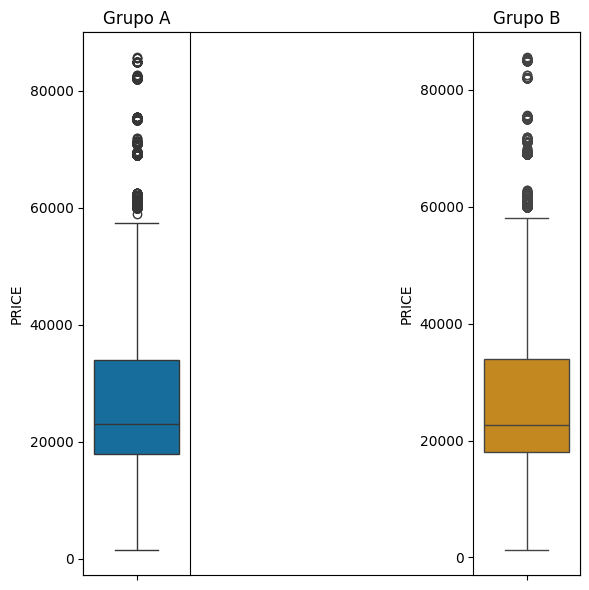

In [ ]:
fig, ax  = plt.subplots(figsize= (6,6))

plt.subplot(1,3,1)
sns.boxplot(groupA['PRICE'] , color = palette[0])
plt.title('Grupo A')

plt.subplot(1,3,3)
sns.boxplot(groupB['PRICE'] , color = palette[1])
plt.title('Grupo B')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

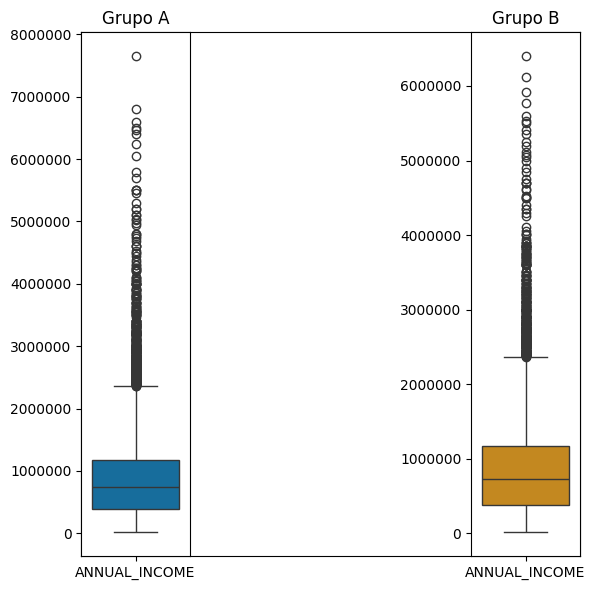

In [ ]:
fig, ax  = plt.subplots(figsize= (6,6))

plt.subplot(1,3,1)
maxim = groupA["ANNUAL_INCOME"].max()
sns.boxplot(groupA['ANNUAL_INCOME'].to_frame().query(f'ANNUAL_INCOME < {maxim}') , color = palette[0]) #foi retirada o valor máximo para facilitar a comparação entre os dos gráficos, isso não afeta a consistênncia dos dados
plt.ticklabel_format(style='plain', axis='y')
plt.title('Grupo A')

plt.subplot(1,3,3)
maxim = groupB["ANNUAL_INCOME"].max()
sns.boxplot(groupB['ANNUAL_INCOME'].to_frame().query(f'ANNUAL_INCOME < {maxim}'), color = palette[1]) #foi retirada o valor máximo para facilitar a comparação entre os dos gráficos, isso não afeta a consistênncia dos dados
plt.title('Grupo B')
plt.ticklabel_format(style='plain', axis='y')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

A distribuição das vendas e da renda anual dos clientes são semelhantes nos dois grupos, ou seja, esses fatores não são determinantes para a divisão entre esses grupos.

#### Colunas categóricas

In [ ]:
groupA.drop(['DATE', 'ANNUAL_INCOME', 'PRICE', 'YEAR', 'MONTH', 'DEALER_NAME'], axis = 1).describe().round(2)

,GENDER,COMPANY,MODEL,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,DEALER_REGION
count,12617,12617,12617,12617,12617,12617,12617,12617
unique,2,30,154,2,3,7,5,7
top,Male,Chevrolet,Prizm,Auto,Pale White,85257-3102,SUV,Austin
freq,9939,965,221,6635,5970,2562,3387,2606


In [ ]:
groupB.drop(['DATE', 'ANNUAL_INCOME', 'PRICE', 'YEAR', 'MONTH', 'DEALER_NAME'], axis = 1).describe().round(2)


,GENDER,COMPANY,MODEL,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,DEALER_REGION
count,11289,11289,11289,11289,11289,11289,11289,11289
unique,2,30,154,2,3,7,5,7
top,Male,Chevrolet,Diamante,Auto,Pale White,38701-8047,SUV,Pasco
freq,8859,854,218,5936,5286,1886,2987,1778


A distribuição dessas variáveis, com exceção da região da loja,  permanecem semelhantes nos dois grupos, o que leva a conclusão que, à priori, nenhum desses fatores é determinante para a divisão entre esses grupos.  

Em relação a região, há uma diferença considerável no valor que aparece com mais frequência, o que pode ser um indicio de uma relação com a divisão dos grupos.

#### Região

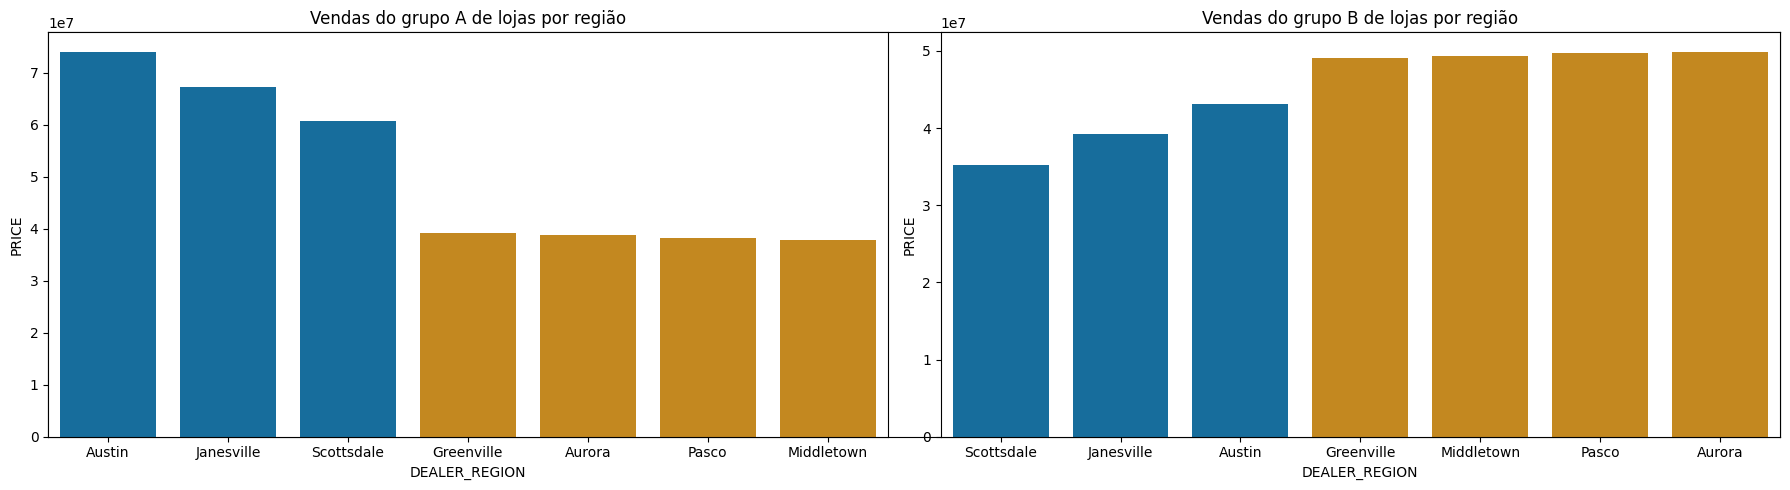

In [ ]:
cores = [palette[0] if x in ['Scottsdale', 'Janesville', 'Austin'] else palette[1] for x in groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame().index]

fig, ax  = plt.subplots(figsize= (18,5))

plt.subplot(1,2,1)
sns.barplot(data = groupA.groupby('DEALER_REGION')['PRICE'].sum().sort_values(ascending=False).to_frame(), x= 'DEALER_REGION', y ='PRICE',palette= cores)
plt.title('Vendas do grupo A de lojas por região')

plt.subplot(1,2,2)
sns.barplot(data = groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame(), x= 'DEALER_REGION', y ='PRICE',palette= cores)
plt.title('Vendas do grupo B de lojas por região')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

**Insights :**
* Existe um certo contraste no desempenho das lojas de um grupo por determinada região visto que, as regiões com melhor desempenho de um grupo são as regiões com pior desempenho do outro grupo e vice-versa. Esse entendimento pode contribuir para criação de campanhas e estratégias mais eficientes de acordo com cada objetivo, como por exemplo um projeto de implatação de uma nova unidade de loja em determinada região.

## Análise de vendas por Região

### Distribuição de Vendas

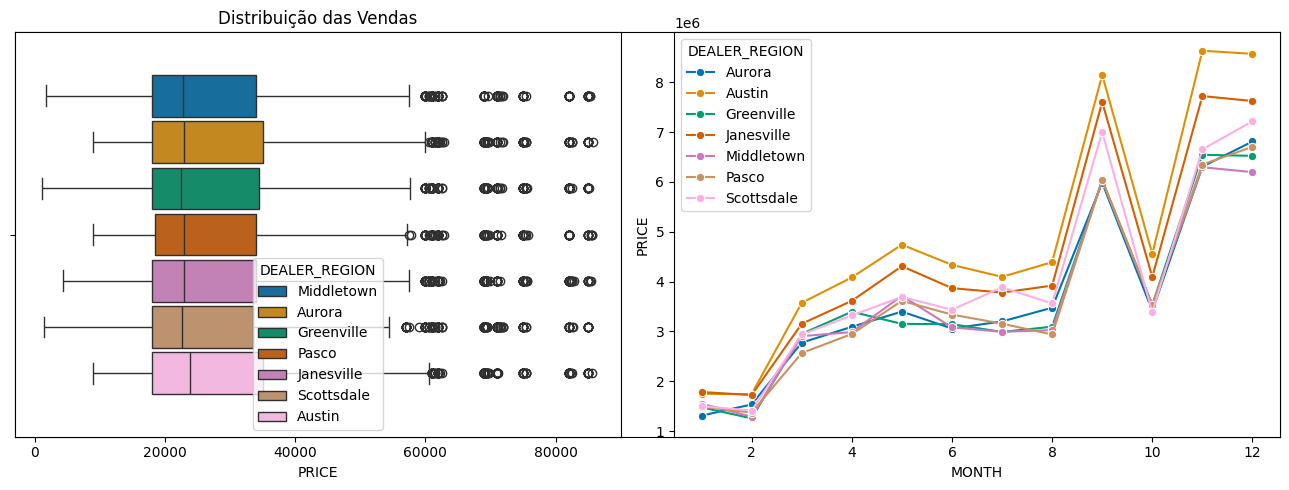

In [ ]:
fig, ax  = plt.subplots(figsize= (13,5))

plt.subplot(1,2,1)
sns.boxplot(data = car_sales_data[['PRICE', 'DEALER_REGION']],x = 'PRICE',  hue = 'DEALER_REGION',gap=.1 )
plt.title('Distribuição das Vendas')

plt.subplot(1,2,2)
monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR','DEALER_REGION'])['PRICE'].sum().to_frame()
sns.lineplot( data = monthly_sales , x= 'MONTH', y = 'PRICE', marker='o', hue = 'DEALER_REGION', errorbar=None)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Com os gráficos é possível concluir que as regiões possuem características semelhantes quanto a distribuição e ao padrão de vendas ao longo do ano.

Como previamente foi possível ver a relação das regiões com a divisão das lojas em dois grupos talvez seja possível fazer uma categorização das regiões também. Foi feito então, baseado nos grupos de loja A e B, dois grupos de região. Grupo 1 contendo Scottsdale, Janesville e Austin, e o grupo 2 as demais.  

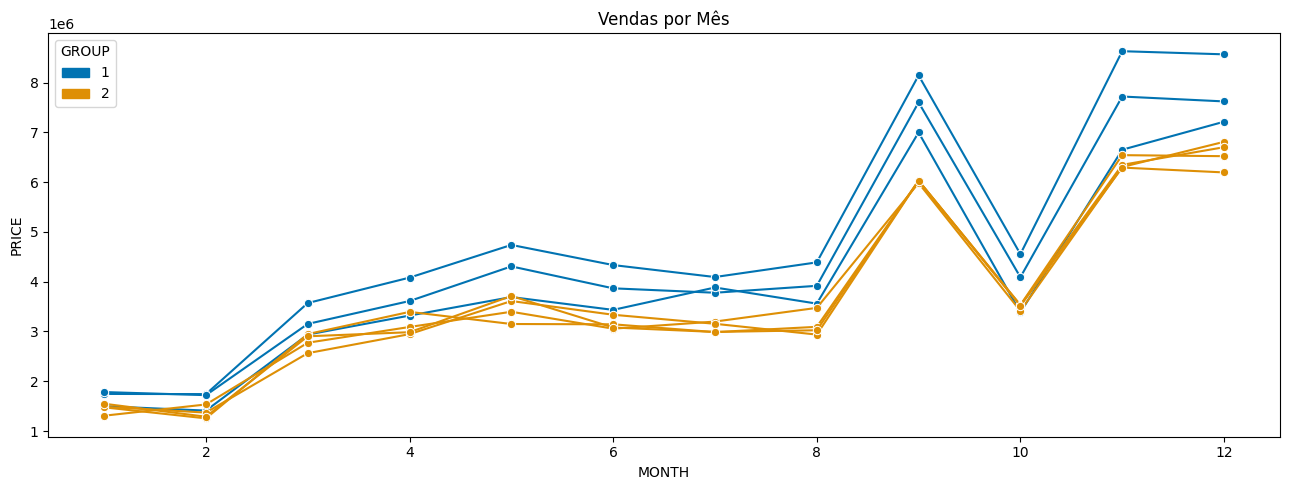

In [ ]:
fig, ax  = plt.subplots(figsize= (13,5))


cores = [palette[0] if x in ['Scottsdale', 'Janesville', 'Austin'] else palette[1] for x in groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame().index]
ordem = [ 'Austin' , 'Janesville' , 'Scottsdale' , 'Greenville' , 'Aurora' , 'Pasco' , 'Middletown']
A_patch = mpatches.Patch(color= palette[0], label='1')
B_patch = mpatches.Patch(color= palette[1] ,label='2')


monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR','DEALER_REGION'])['PRICE'].sum().to_frame()
sns.lineplot( data = monthly_sales , x= 'MONTH', y = 'PRICE', marker='o', hue = 'DEALER_REGION', errorbar=None,  palette = cores , hue_order = ordem)
plt.title('Vendas por Mês')

plt.legend(handles=[A_patch, B_patch], title = 'GROUP')

plt.tight_layout()
plt.show()

Como mostra os gráficos,a categorização se mostra eficiente, visto o padrão que as regiões do mesmo segmento apresentam.

## Características do carro

### Marca



#### Marcas - GERAL

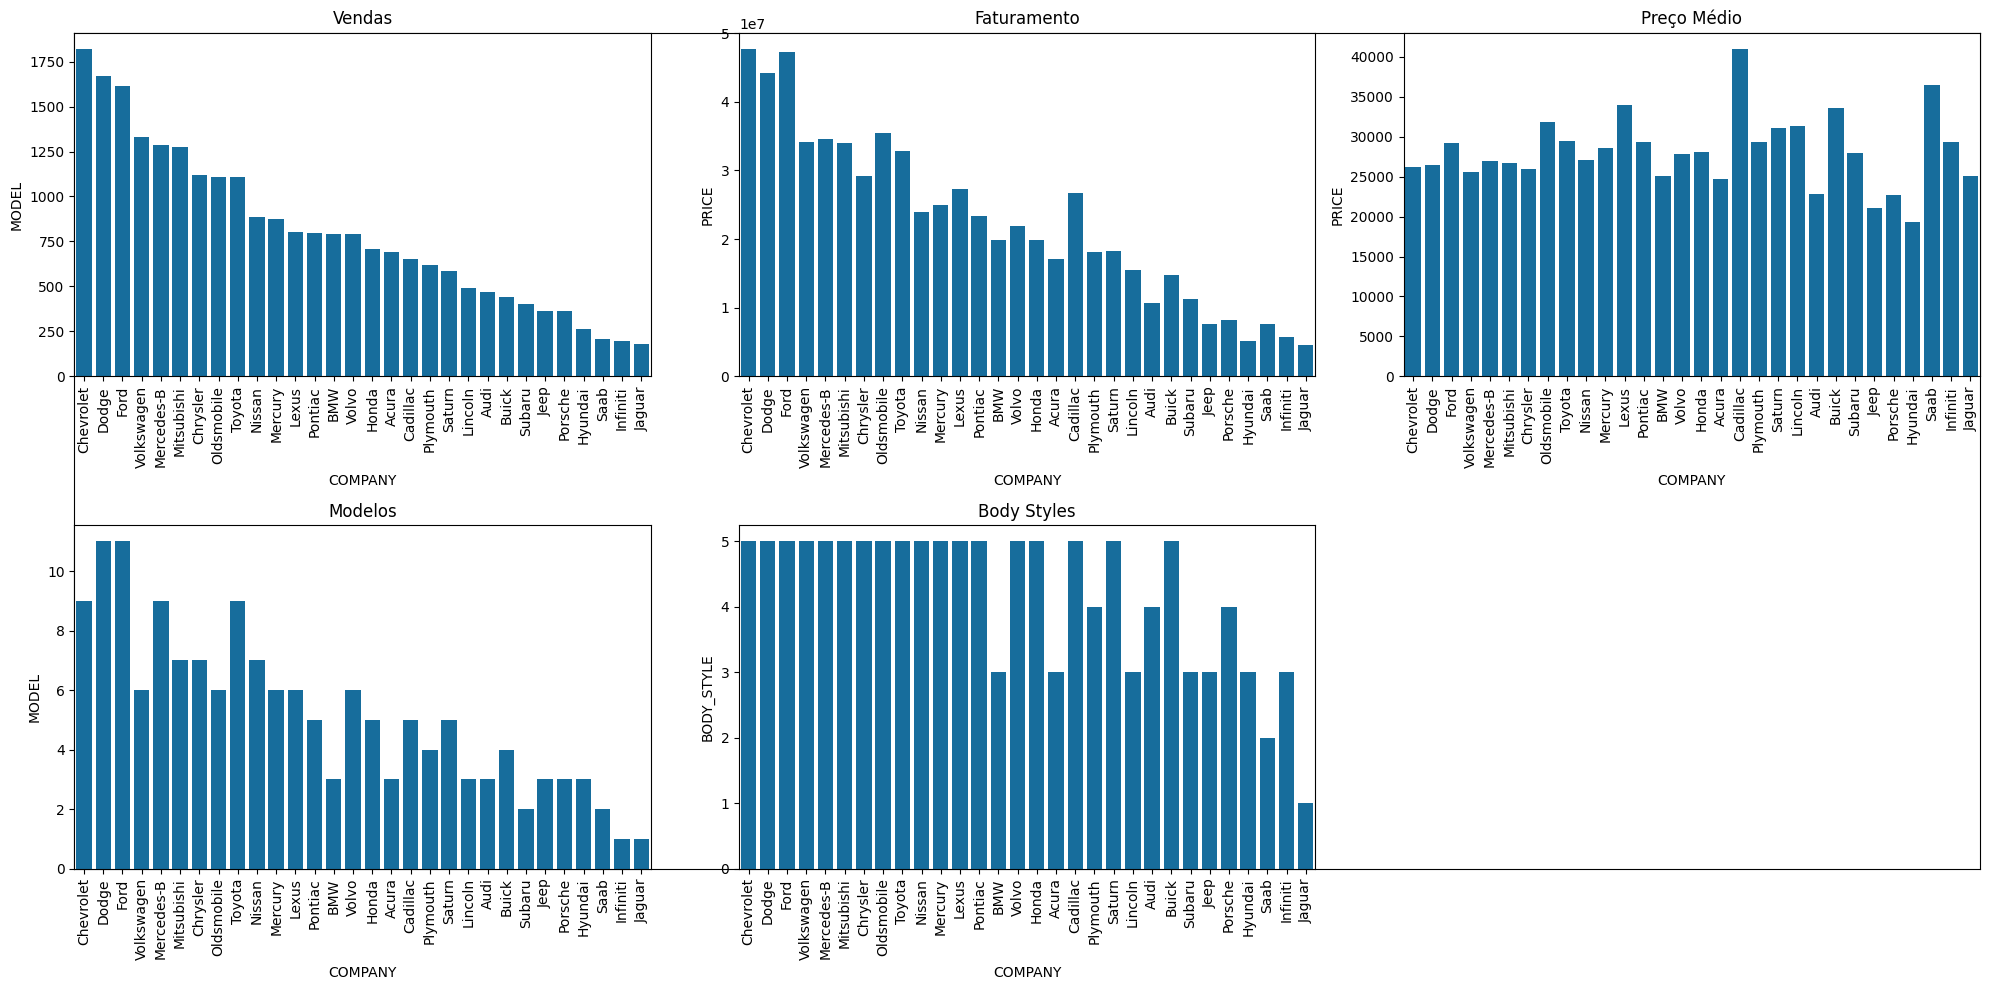

In [ ]:
sales_order = list (car_sales_data.groupby('COMPANY')["MODEL"].count().sort_values(ascending = False).index)
body_style_order = car_sales_data.groupby("BODY_STYLE")["MODEL"].count().sort_values(ascending = False).index

car_sales_data.groupby('COMPANY')["MODEL"].count().sort_values(ascending = False).index
sales_order =['Chevrolet', 'Dodge', 'Ford', 'Volkswagen', 'Mercedes-B', 'Mitsubishi',
       'Chrysler', 'Oldsmobile', 'Toyota', 'Nissan', 'Mercury', 'Lexus',
       'Pontiac', 'BMW', 'Volvo', 'Honda', 'Acura', 'Cadillac', 'Plymouth',
       'Saturn', 'Lincoln', 'Audi', 'Buick', 'Subaru', 'Jeep', 'Porsche',
       'Hyundai', 'Saab', 'Infiniti', 'Jaguar']
body_style_order = car_sales_data.groupby("BODY_STYLE")["MODEL"].count().sort_values(ascending = False).index

fig, ax = plt.subplots(figsize = (20,10))

plt.subplot(2,3,1)
sns.barplot(car_sales_data.groupby('COMPANY')["MODEL"].count(), order = sales_order )
plt.title('Vendas')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(car_sales_data.groupby('COMPANY')["PRICE"].sum(), order = sales_order)

plt.title('Faturamento')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.barplot(car_sales_data.groupby('COMPANY')["MODEL"].nunique(), order = sales_order)
plt.title('Modelos')
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.barplot(car_sales_data.groupby('COMPANY')["PRICE"].mean(), order = sales_order)
plt.title('Preço Médio')
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.barplot(car_sales_data.groupby('COMPANY')["BODY_STYLE"].nunique(), order = sales_order)
plt.title('Body Styles')
plt.xticks(rotation=90)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

**Insights :**
* Embora algumas marcas tenham menor numero de vendas, ainda conseguiram um faturamento maior que marcas com mais carros vendidos, o que pode ser causado pelo preço dos carros. O caso mais evidente disso é com a marca Cadillac, que teve faturamento maior que 8 marcas que venderam mais, além de ser a marca com o maior preço médio de carro.
* O comportamento do gráfico de modelos apresenta um comportamento parecido com o de vendas, isso pode apontar que a variedade de modelos de uma marca impacta nas suas vendas, com marcas com mais modelos vendendo mais carros.
* O preço dos carros não é um fator determinante nessa amostra, visto que as marcas apresentam um média de preço semlhante.

#### Marcas com melhor desempenho


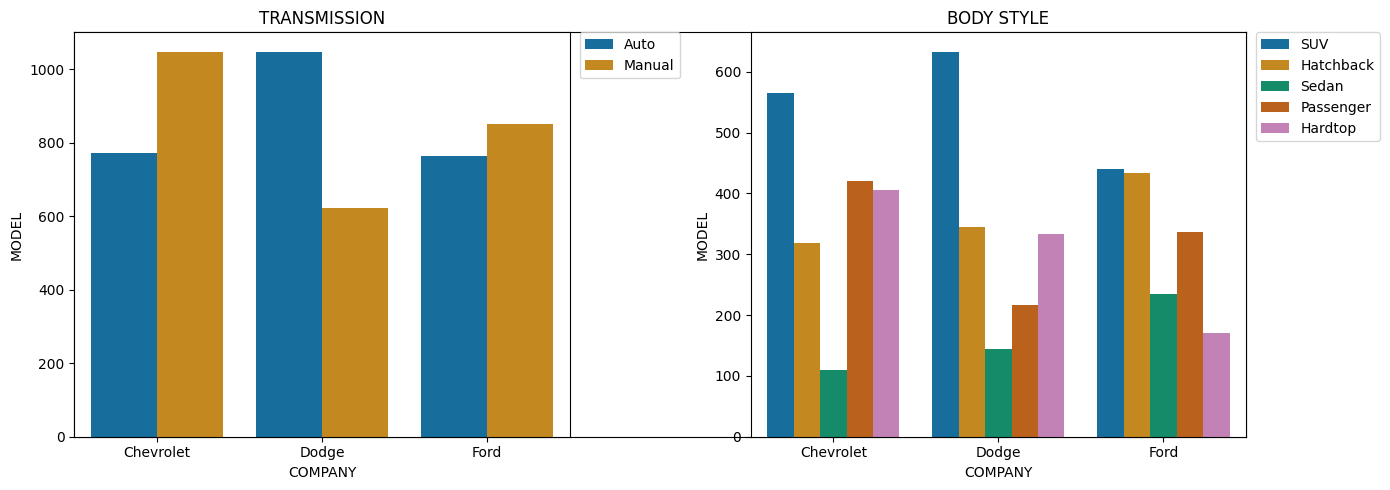

In [ ]:
top3 = car_sales_data.query(f'COMPANY in {sales_order[0:3]}')

fig, ax = plt.subplots(figsize = (14,5))

plt.subplot(1,2,1)
sns.barplot(data = top3.groupby(["COMPANY","TRANSMISSION"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = "TRANSMISSION", order = sales_order[0:3], palette = palette)
plt.title('TRANSMISSION')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplot(1,2,2)
sns.barplot(data = top3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = 'BODY_STYLE', order = sales_order[0:3], hue_order = body_style_order ,  palette = palette)
plt.title('BODY STYLE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()

**Insights :**
* Pelo que mostra os gráficos, as 3 empresas possuem distrubuições diferentes em relação a transmissão e estilo de carro, embora seja possível perceber que o maior número de vendas para as três marca é do mesmo estilo, "SUV", o que faz sentido, visto que é o estilo mais vendido na base de dados.

#### Marcas com pior desempenho


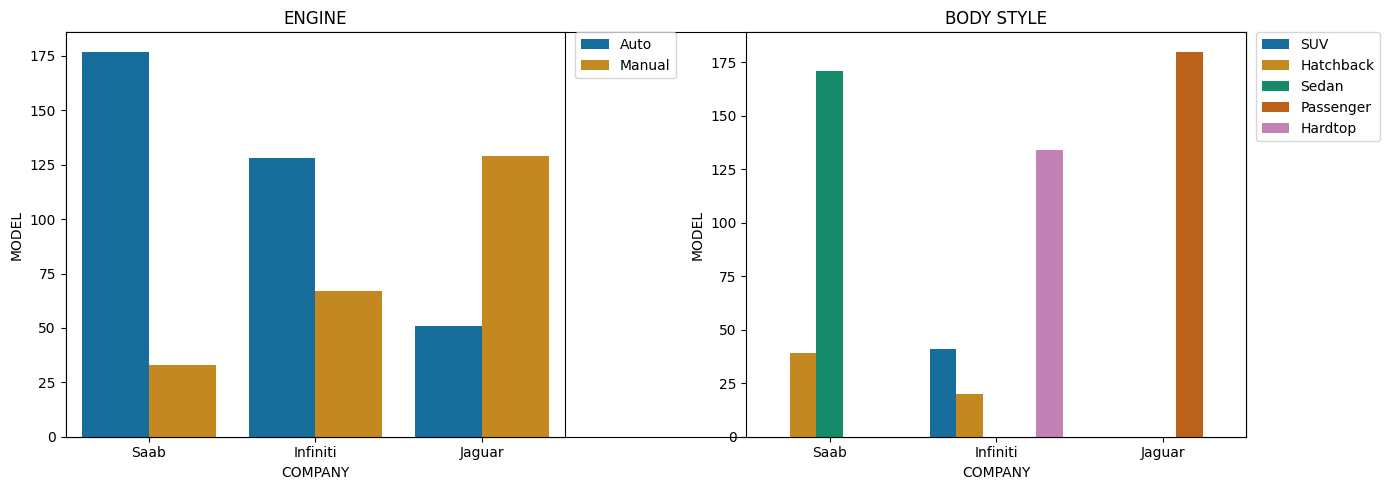

In [ ]:
bottom3 = car_sales_data.query(f'COMPANY in {sales_order[27:30]}')

fig, ax = plt.subplots(figsize = (14,5))

plt.subplot(1,2,1)
sns.barplot(data = bottom3.groupby(["COMPANY","TRANSMISSION"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = "TRANSMISSION", order = sales_order[27:30])
plt.title('ENGINE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplot(1,2,2)
sns.barplot(data = bottom3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = 'BODY_STYLE', order = sales_order[27:30], hue_order = body_style_order)
plt.title('BODY STYLE')
ax.set(ylim=(0, bottom3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame().reset_index()['MODEL'].max()))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()

**Insights :**
* Nos piores casos é possiível ver diferenças entre as empresas nos dois gráficos. Porém , quando analisado o estilo do carro, as empresas não possuem vendas com todos os estilos , o que pode ter impacto nas vendas para o público geral. De fato, o estilo mais vendido de cada empresa faz parte do grupo com estilos de menor número de venda, levantando a possibilidade dessas empresas terem como objetivo um público mais específico.

### Body Style

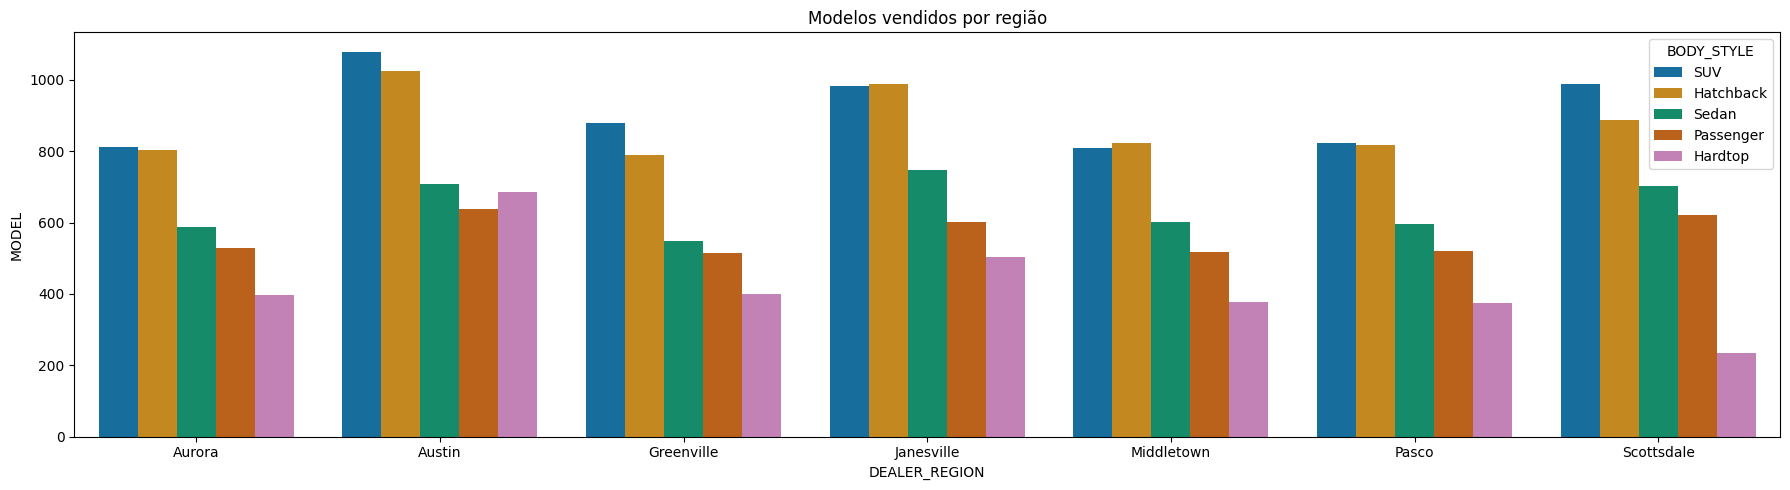

In [ ]:
fig, ax = plt.subplots(figsize = (18,5))

sns.barplot(car_sales_data.groupby(['BODY_STYLE', 'DEALER_REGION'])["MODEL"].count().to_frame(),x = 'DEALER_REGION', y = "MODEL", hue = "BODY_STYLE", hue_order = body_style_order )
plt.title('Modelos vendidos por região')

plt.tight_layout()
plt.show()

**Insights:**
* Em geral, a distribuição de vendas por estilo de carro em cada região é semelhante. Porém , é interessante analisar as vendas de hardtops em Austin. A região de Austin é a única em que carros Hardtop não são os menos vendidos, enquanto nas outras regiões esse número é bem menor que as vendas de carros do tipo Passenger.

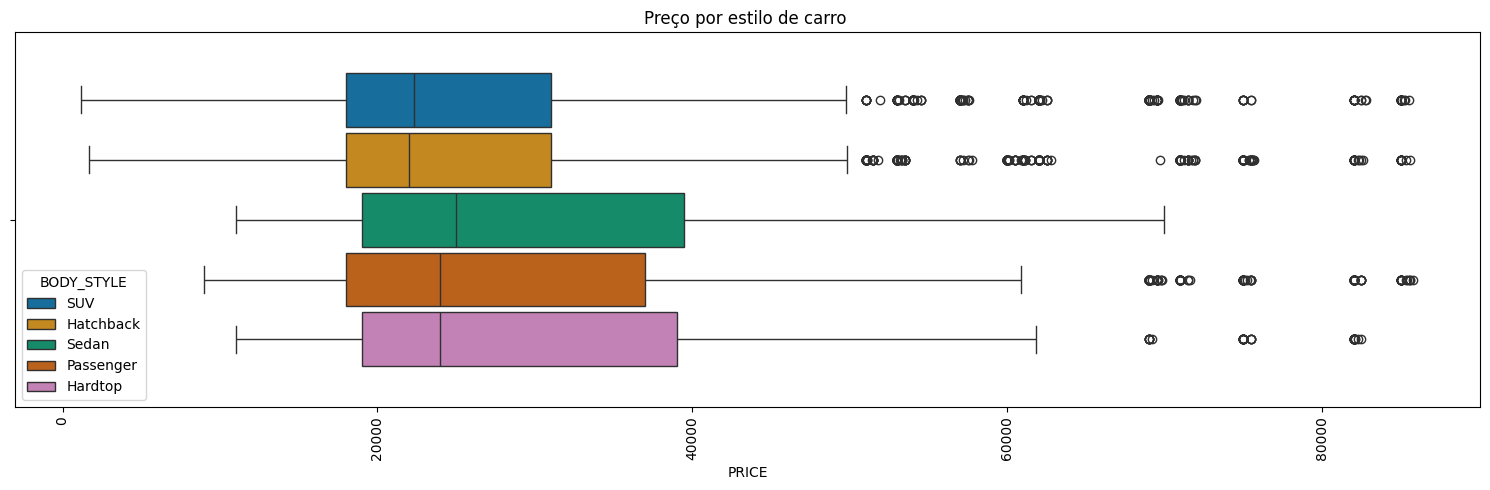

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))

sns.boxplot(car_sales_data[["PRICE", "BODY_STYLE"]],x = "PRICE", hue = "BODY_STYLE", hue_order = body_style_order , gap = 0.1)
plt.title('Preço por estilo de carro ')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insights:**
* A distrbuição dos preços dos dois estilos de carro mais vendidos são semelhantes e se concentram em valores menores, o que pode ter correlação direta com a sua popularidade. Enquanto os outros estilos apresentam mais vendas (em proporção) de carros mais caros.

### Preferências por gênero

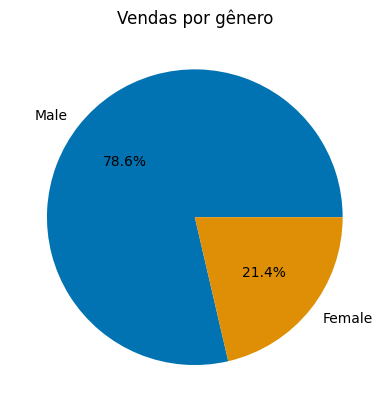

In [ ]:

plt.pie(car_sales_data['GENDER'].value_counts() , labels = ['Male' , 'Female'], autopct='%1.1f%%')
plt.title('Vendas por gênero')
plt.show()

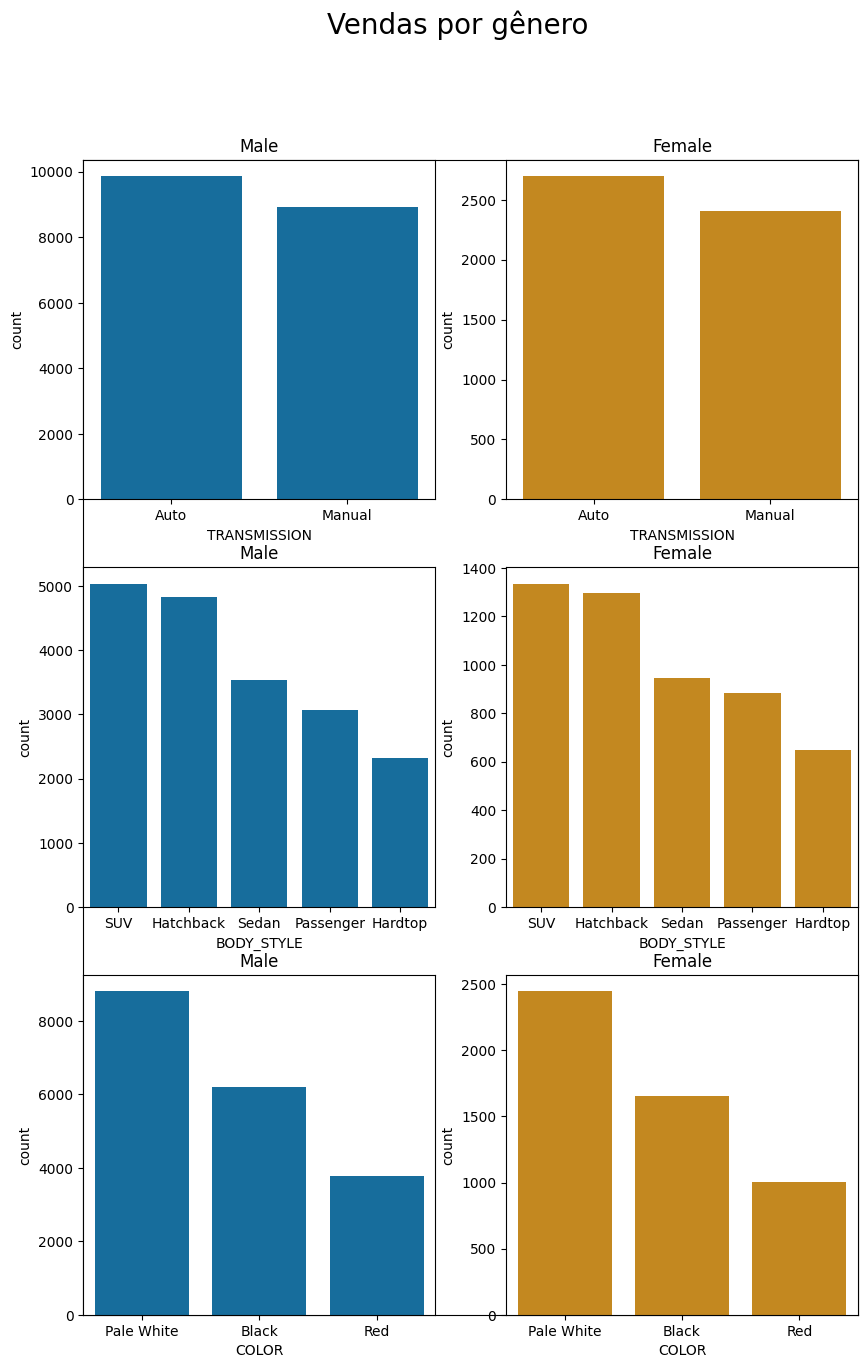

In [ ]:
fig, ax = plt.subplots(figsize = (10,15))

plt.subplot(3,2,1)
sns.barplot(car_sales_data.query('GENDER == "Male"')['TRANSMISSION'].value_counts())
plt.title('Male')
plt.subplot(3,2,2)
sns.barplot(car_sales_data.query('GENDER == "Female"')['TRANSMISSION'].value_counts(), color = palette[1])
plt.title('Female')

plt.subplot(3,2,3)
sns.barplot(car_sales_data.query('GENDER == "Male"')['BODY_STYLE'].value_counts())
plt.title('Male')
plt.subplot(3,2,4)
sns.barplot(car_sales_data.query('GENDER == "Female"')['BODY_STYLE'].value_counts(), color = palette[1])
plt.title('Female')

plt.subplot(3,2,5)
sns.barplot(car_sales_data.query('GENDER == "Male"')['COLOR'].value_counts())
plt.title('Male')
plt.subplot(3,2,6)
sns.barplot(car_sales_data.query('GENDER == "Female"')['COLOR'].value_counts(), color = palette[1])
plt.title('Female')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.suptitle('Vendas por gênero', fontsize = 20)

plt.show()

**Insights:**
* Embora os homens sejam, disparadamente, o maior público consumidor de carros, os dados não apontam para uma diferença significativa entre as preferências de carros por gênero, indo contra possíveis esteriótipos sexistas.

# Modelo de Previsão de Vendas 2024


Por fim, foi solicitado um modelo de previsão de vendas para o próximo ano. Todavia, só foram fornecidos dados das vendas de dois anos e, como foi visto, a sazonalidade das vendas é anual, o que significa que não é possível montar um modelo de ML usando a divisão treino e teste para avaliação, uma vez que se fosse feita a divisão os dados de treino seriam apenas os dados de 2022, o que resultaria uma previsão equivocada sem a noção da sazonalidade das vendas. Vale, ainda , ressaltar que é possível fazer a previsão com um modelo treinado com os dados dos dois anos sem fazer uma avaliação. Embora fazer isso não seja garantia de exatidão para os dados de 2024, pode ser muito útil no planejamento de vendas e outras estratégias.

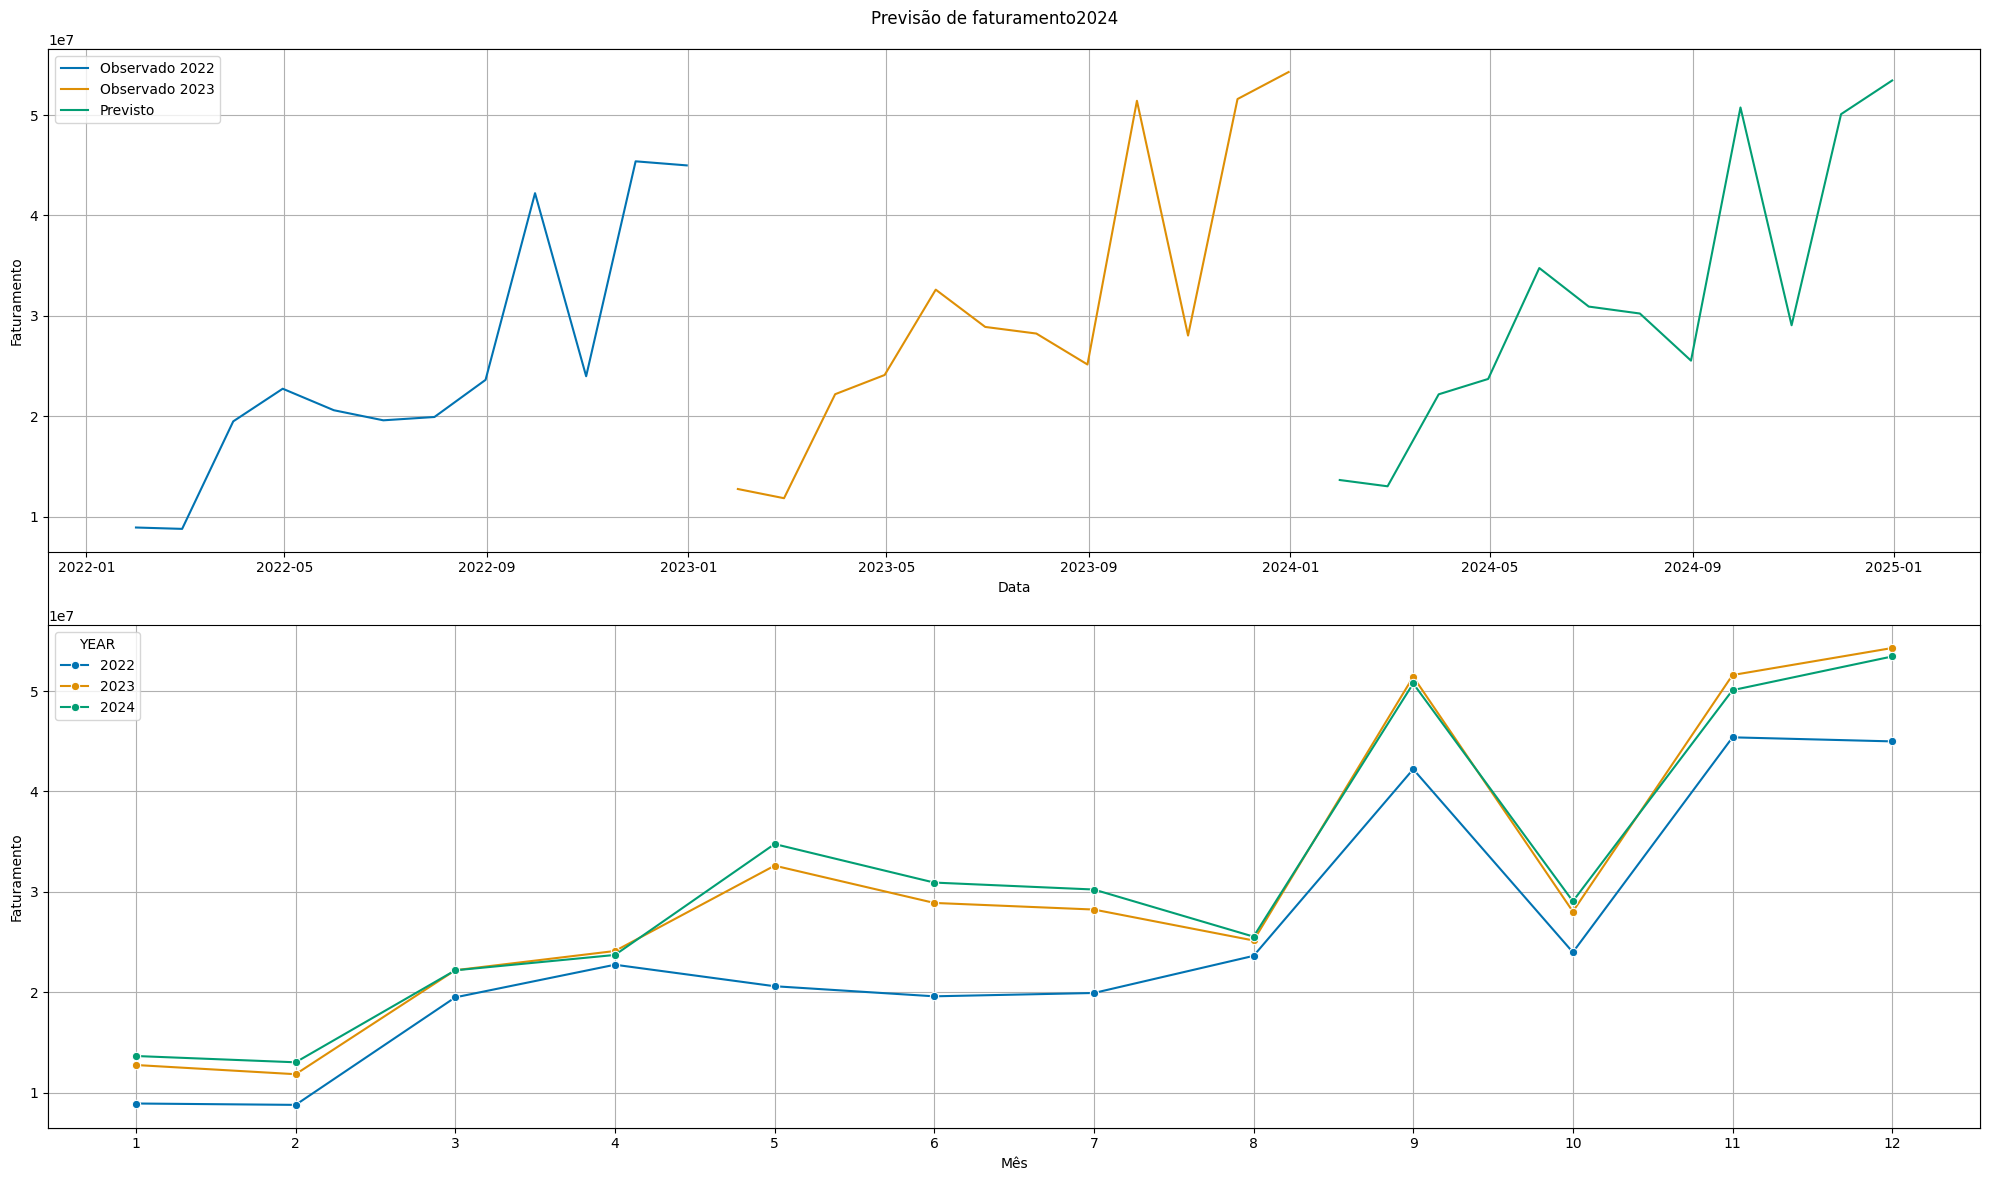

In [ ]:

df = car_sales_data[['PRICE','MONTH', 'YEAR']]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupando os dados por mês para calcular o faturamento mensal
monthly_sales = df.groupby(pd.Grouper(key='DATE', freq='M'))['PRICE'].sum().reset_index()

# Definindo a data como índice
monthly_sales.set_index('DATE', inplace=True)

train = monthly_sales


# Ajustando o modelo SARIMA com sazonalidade anual
sarima_model = sm.tsa.statespace.SARIMAX(train['PRICE'],
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

forecast_steps = 12
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extraindo os valores previstos e intervalos de confiança
forecast_values = sarima_forecast.predicted_mean
confidence_intervals = sarima_forecast.conf_int()

# Visualizando a previsão
fig, ax  = plt.subplots(figsize = (20,12))

plt.subplot(2,1,1)
plt.plot(monthly_sales.index[0:12], monthly_sales['PRICE'][0:12], label='Observado 2022' , color= palette[0] )
plt.plot(monthly_sales.index[12:24], monthly_sales['PRICE'][12:24], label='Observado 2023' , color= palette[1] )
plt.plot(pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M'), forecast_values, label='Previsto', color= palette[2])
plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
sns.lineplot( data = pred_2024, x= 'MONTH', y = 'PRICE', marker='o', hue='YEAR', errorbar=None ,palette = palette)
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.xticks(range(1, 13))
plt.grid(True)
plt.suptitle('Previsão de faturamento2024')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


Com isso, foi possível montar uma previsão de vendas pro ano de 2024. É importante ressaltar que, pela pequena amostragem de dados que foram fornecidos, o intuito desse modelo não é fornecer um modelo exato de previsão das vendas de 2024, mas pode servir para outros intuitos, tais como um estabelecimento de metas de vendas.